# 探索洛伦兹微分方程系统

在这个笔记本中，我们探索了洛伦兹微分方程系统：

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

这是非线性微分方程中的一个经典系统。随着参数（$\sigma$，$beta$，$\rho$）的变化，它展现出一系列不同的行为。

首先，我们从 IPython、NumPy、Matplotlib 和 SciPy 中导入所需的库。

In [1]:
# Imports for JupyterLite
%pip install -q ipywidgets matplotlib numpy scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

In [3]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [4]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

## 计算轨迹并绘制结果

我们定义了一个函数，可以数值地积分微分方程，然后绘制解决方案。这个函数有控制微分方程参数（$\sigma$，$\beta$，$\rho$）的参数，数值积分（`N`，`max_time`）以及可视化（`angle`）。

In [5]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

让我们调用一次函数来查看解决方案。对于这组参数，我们看到轨迹围绕两个点旋转，这两个点称为吸引子(attractors)。

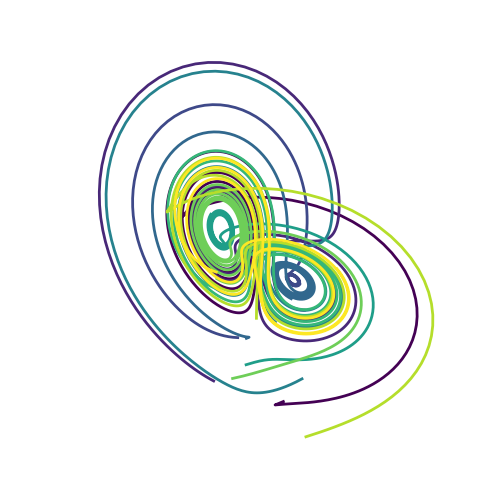

In [6]:
t, x_t = solve_lorenz(angle=0, N=10)

使用 IPython 的 `interactive` 函数，我们可以探索当我们改变各种参数时轨迹的行为。

In [7]:
w = interactive(solve_lorenz, angle=(0.,360.), max_time=(0.1, 4.0), 
                N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w)

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

由 `interactive` 返回的对象是一个 `Widget` 对象，它具有包含当前结果和参数的属性：

In [8]:
t, x_t = w.result

In [9]:
w.kwargs

{'N': 10,
 'angle': 0.0,
 'max_time': 4.0,
 'sigma': 10.0,
 'beta': 2.6666666666666665,
 'rho': 28.0}

在与系统交互之后，我们可以取结果并进行进一步的计算。在这个例子中，我们计算了 \(x\)、\(y\) 和 \(z) 的平均位置。

In [10]:
xyz_avg = x_t.mean(axis=1)

In [11]:
xyz_avg.shape

(10, 3)

创建平均位置（跨不同轨迹）的直方图表明，平均而言，轨迹围绕吸引子旋转。

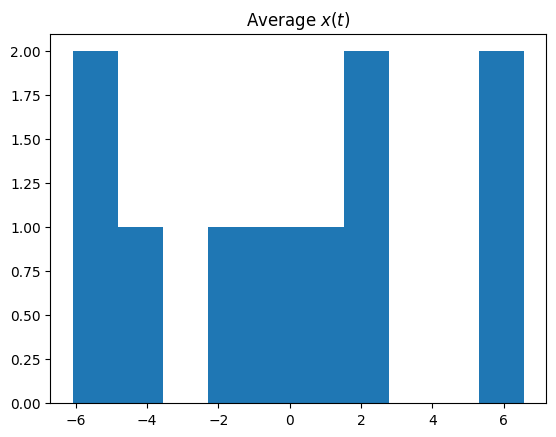

In [12]:
plt.hist(xyz_avg[:,0])
plt.title('Average $x(t)$');

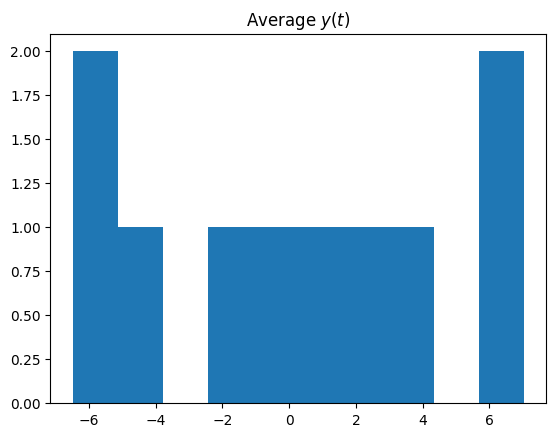

In [13]:
plt.hist(xyz_avg[:,1])
plt.title('Average $y(t)$');